In [13]:
#importing libraries
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



1.) k-Nearest Neighbors

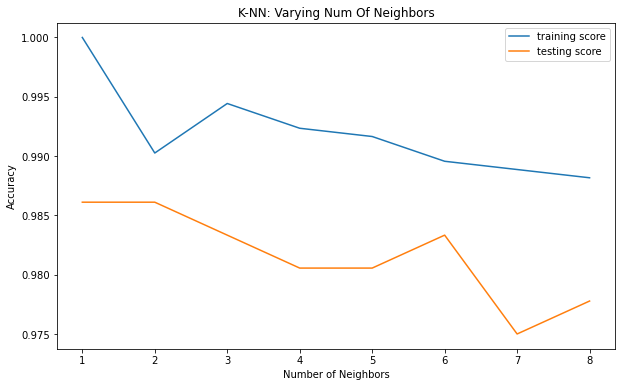

In [14]:
digits=datasets.load_digits()
X= digits.data
y= digits.target
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
train_score=[]
test_score=[]
for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
    
knn_score=knn.score(X_train,y_train)

#plotting knn varying number of neighbours
plt.figure(figsize=(10,6))
plt.plot(range(1,9), train_score, label= "training score")
plt.plot(range(1,9), test_score, label= "testing score")
plt.xlabel("Number Of Neighbours")
plt.ylabel("Accuracy")
plt.title('K-NN: Varying Num Of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend();


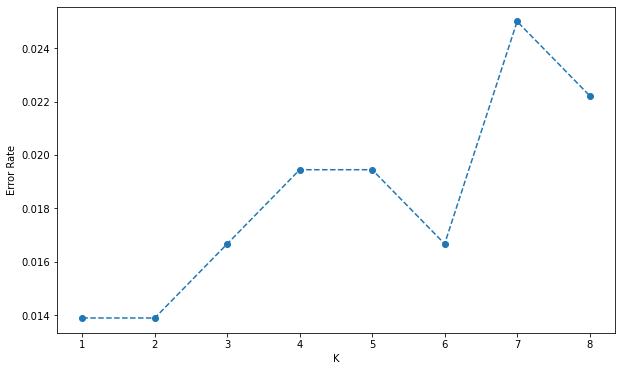

In [15]:
#Finding the best value for K
err = []
for i in range(1,9):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 prediction = knn.predict(X_test)
 err.append(np.mean(prediction != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,9),err, linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate');


In [16]:
#The best value for k is 2

2. Support Vector Machine

In [17]:
svm = SVC(kernel="linear")
svm.fit(X_train,y_train)
prediction=svm.predict(X_test)
svm_score = svm.score(X_train,y_train)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.97      0.98        32
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        37
           4       1.00      1.00      1.00        43
           5       0.97      0.97      0.97        38
           6       1.00      1.00      1.00        35
           7       0.97      1.00      0.98        30
           8       0.97      0.97      0.97        36
           9       0.92      0.97      0.95        37

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [18]:
#Poly
svm= SVC(kernel='poly')
svm.fit(X_train,y_train)
prediction = svm.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39
           3       1.00      0.97      0.99        37
           4       0.96      1.00      0.98        43
           5       1.00      0.95      0.97        38
           6       1.00      1.00      1.00        35
           7       0.94      1.00      0.97        30
           8       1.00      1.00      1.00        36
           9       0.97      0.97      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [19]:
#RBF
svm= SVC(kernel='rbf')
svm.fit(X_train,y_train)
prediction = svm.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39
           3       1.00      0.97      0.99        37
           4       0.98      0.98      0.98        43
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        35
           7       0.94      1.00      0.97        30
           8       0.97      0.97      0.97        36
           9       0.95      0.97      0.96        37

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



The above analysis shows that linear kernel should be used for the classification problem

Naive Bayes

[Text(0.5, 51.0, 'Predicted value'), Text(69.0, 0.5, 'True value')]

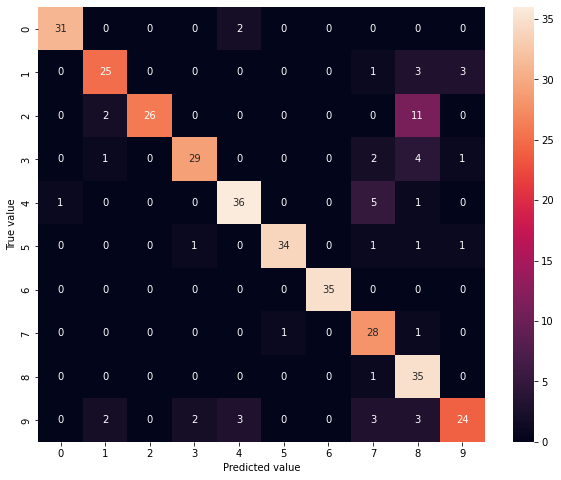

In [20]:
bayes = GaussianNB()
bayes.fit(X_train,y_train)
prediction=bayes.predict(X_test)
bayes_score=bayes.score(X_train,y_train)
accuracy_matrix=confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
ax = sns.heatmap(accuracy_matrix,annot=True)
ax.set(xlabel="Predicted value", ylabel="True value")

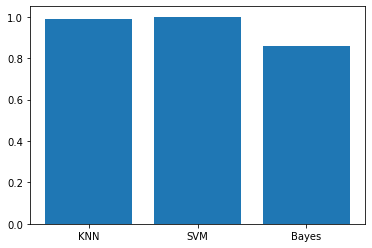

In [21]:
#plotting accuracy score of classifier models
d = [knn_score, svm_score, bayes_score]
x = np.arange(3)
fig, ax = plt.subplots()
plt.bar(x, d)
plt.xticks(x, ('KNN', 'SVM', 'Bayes'))
plt.show()

The above graph shows SVM classifier is the most accurate

Regression

   population  fertility  HIV        CO2  BMI_male    GDP  BMI_female  life  \
0    34811059       2.73  0.1   3.328945  24.59620  12314    129.9049  75.3   
1    19842251       6.43  2.0   1.474353  22.25083   7103    130.1247  58.3   
2    40381860       2.24  0.5   4.785170  27.50170  14646    118.8915  75.5   
3     2975029       1.40  0.1   1.804106  25.35542   7383    132.8108  72.5   
4    21370348       1.96  0.1  18.016313  27.56373  41312    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


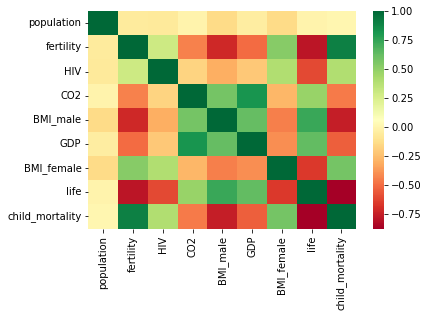

In [22]:
df = pd.read_csv('gapminder.csv')
print(df.head())
sns.heatmap(df.corr(),cmap="RdYlGn");


0.6192442167740035


C:\Users\Farzana Kabir Odri\AppData\Local\Temp/ipykernel_23360/182791954.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(x[:,None],y);
C:\Users\Farzana Kabir Odri\AppData\Local\Temp/ipykernel_23360/182791954.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(reg.score(x[:,None],y))
C:\Users\Farzana Kabir Odri\AppData\Local\Temp/ipykernel_23360/182791954.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax= plt.plot(x,y, 'bo', x,reg.predict(x[:,None]), '-k');


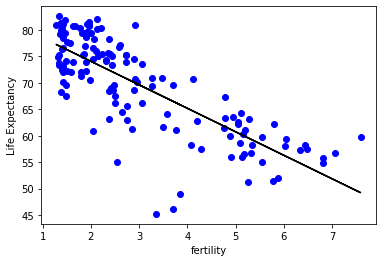

In [23]:
reg =LinearRegression()
x = df["fertility"]
y= df["life"]
reg.fit(x[:,None],y);
print(reg.score(x[:,None],y))
fig, ax= plt.plot(x,y, 'bo', x,reg.predict(x[:,None]), '-k');
plt.xlabel('fertility')
plt.ylabel('Life Expectancy');

In [24]:
#cross validation score with one feature
cross_val_score(reg,x[:,None],y,cv=5)

C:\Users\Farzana Kabir Odri\AppData\Local\Temp/ipykernel_23360/1780280333.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score(reg,x[:,None],y,cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [25]:
#regression with all features
x=df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y=df["life"]
regression= LinearRegression()
regression.fit(x,y)
print(cross_val_score(regression,x,y,cv=5))

[0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]


In [26]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


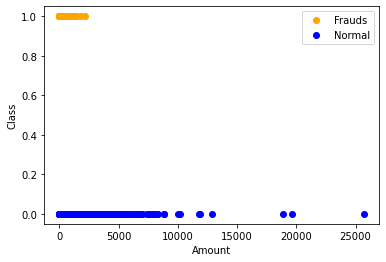

In [27]:
frauds = df.loc[df['Class'] == 1]

non_frauds = df.loc[df['Class'] == 0]
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label='Frauds')
plt.plot(non_frauds.Amount,
         non_frauds.Class,
         'o',
         color="blue",
         label='Normal')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()

plt.show()

C:\Users\Farzana Kabir Odri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Farzana Kabir Odri\AppData\Local\Temp/ipykernel_23360/385938279.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(Xlabel="Predicted value",


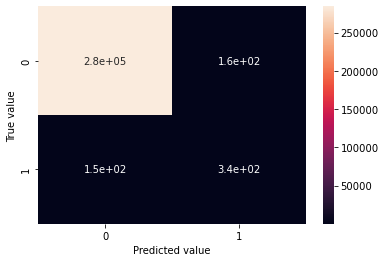

In [28]:
#logistic regression
X = df.drop("Class", axis=1)
Y = df['Class']

regression = LogisticRegression()
regression.fit(X,Y)
prediction =regression.predict(X)
matrix= confusion_matrix(Y,prediction)
ax=sns.heatmap(matrix,annot=True)
ax.set(Xlabel="Predicted value",
      ylabel="True value");